<a href="https://colab.research.google.com/github/mprksa/5warna/blob/main/DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [2]:
!git clone https://github.com/mprksa/5warna.git

Cloning into '5warna'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 92 (delta 18), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (92/92), 109.40 MiB | 16.99 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Updating files: 100% (50/50), done.


In [11]:
# Path ke direktori gambar
image_dir = '/content/5warna'

In [12]:
# Warna kubus dan labelnya
colors = ['biru', 'kuning', 'merah', 'putih', 'ungu']
labels = {'biru': 0, 'kuning': 1, 'merah': 2, 'putih': 3, 'ungu': 4}

In [13]:
# Menginisialisasi array untuk menyimpan nilai HSV dan label
hsv_values = []
color_labels = []

In [14]:
# Loop melalui setiap warna dan proses gambarnya
for color in colors:
    color_dir = os.path.join(image_dir, color)
    for img_name in os.listdir(color_dir):
        img_path = os.path.join(color_dir, img_name)
        image = cv2.imread(img_path)
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Menghitung rata-rata HSV
        avg_hsv = np.mean(hsv_image.reshape(-1, 3), axis=0)

        hsv_values.append(avg_hsv)
        color_labels.append(labels[color])

hsv_values = np.array(hsv_values)
color_labels = np.array(color_labels)

In [15]:
# Menghitung jumlah gambar yang dilatih per kelas
num_images_per_class = {color: sum(1 for img_name in os.listdir(os.path.join(image_dir, color))) for color in colors}
print("Jumlah gambar yang dilatih per kelas:")
print(num_images_per_class)

Jumlah gambar yang dilatih per kelas:
{'biru': 10, 'kuning': 10, 'merah': 10, 'putih': 10, 'ungu': 10}


In [16]:
# Menghitung nilai minimum, maksimum, dan rata-rata H, S, dan V pada tiap kelas
hsv_df = pd.DataFrame(hsv_values, columns=['H', 'S', 'V'])
hsv_df['label'] = color_labels

for label, color in labels.items():
    class_stats = hsv_df[hsv_df['label'] == color].describe().loc[['min', 'max', 'mean']]
    print(f"Statistik HSV untuk kelas {label}:")
    print(class_stats)

Statistik HSV untuk kelas biru:
              H          S           V  label
min   31.164612  38.924139   64.162440    0.0
max   49.730265  59.502403  115.688963    0.0
mean  39.697642  47.425892   88.279453    0.0
Statistik HSV untuk kelas kuning:
               H          S           V  label
min    45.565988  35.625047   53.983743    1.0
max   102.270490  97.617601  100.135815    1.0
mean   85.969569  63.408100   74.187948    1.0
Statistik HSV untuk kelas merah:
              H          S           V  label
min   17.738440  38.812944   91.836591    2.0
max   26.161265  67.520021  110.844266    2.0
mean  22.198592  53.278452  102.006644    2.0
Statistik HSV untuk kelas putih:
              H          S           V  label
min   22.010363  12.089440   62.943604    3.0
max   41.668930  73.859910  103.806988    3.0
mean  31.786106  28.681486   78.492578    3.0
Statistik HSV untuk kelas ungu:
              H          S           V  label
min   45.446565  23.684833   88.686395    4.0
max 

In [40]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(hsv_values, color_labels, test_size=0.2, random_state=60)

In [41]:
# Melatih model decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
# Memprediksi label pada data uji
y_pred = model.predict(X_test)

In [43]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy * 100:.2f}%')

Akurasi model: 80.00%


In [47]:
# Menampilkan Classification Report
print("Classification Report:")
# Assuming 'colors' is defined somewhere and has the correct class names
print(classification_report(y_test, y_pred, target_names=colors[:5])) # Slice colors list to match number of classes

Classification Report:
              precision    recall  f1-score   support

        biru       1.00      1.00      1.00         1
      kuning       1.00      0.50      0.67         2
       merah       1.00      1.00      1.00         2
       putih       1.00      0.50      0.67         2
        ungu       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.92      0.80      0.82        10
weighted avg       0.88      0.80      0.79        10



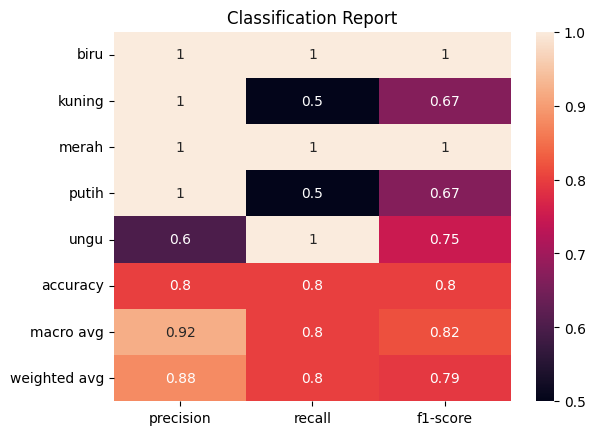

In [49]:
# Menampilkan grafik Classification Report
report = classification_report(y_test, y_pred, target_names=colors[:5], output_dict=True) # Slice colors to match number of classes
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
plt.title('Classification Report')
plt.show()

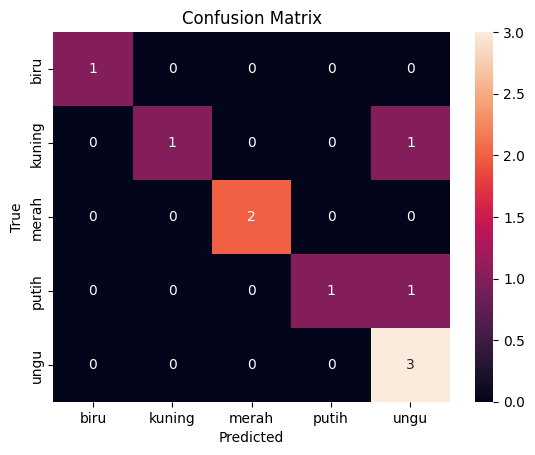

In [50]:
# Menampilkan Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=colors, yticklabels=colors)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

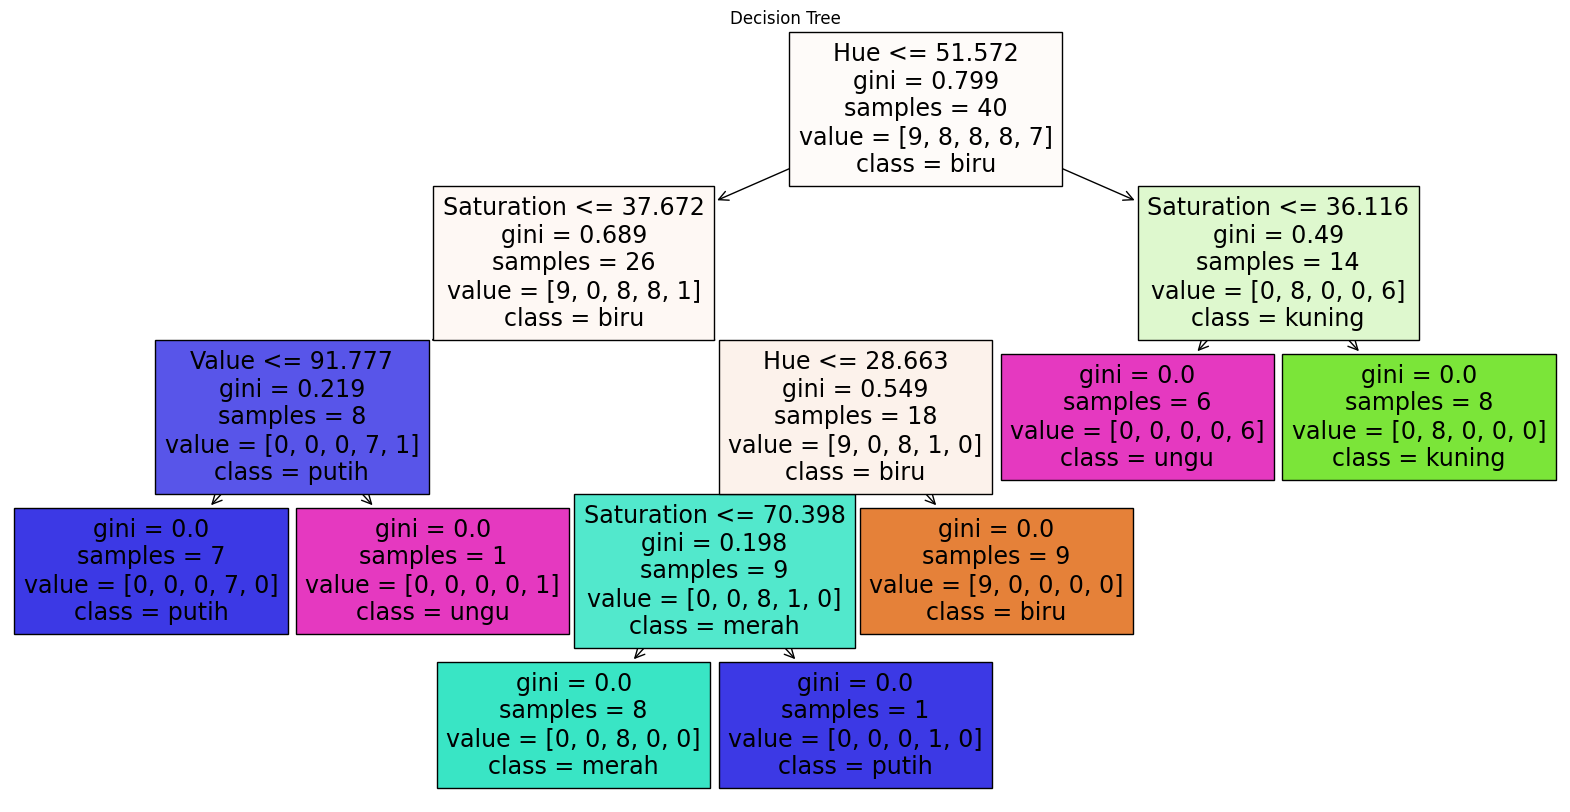

In [51]:
# Menampilkan Decision Tree
plt.figure(figsize=(20,10))
from sklearn.tree import plot_tree

plot_tree(model, feature_names=['Hue', 'Saturation', 'Value'], class_names=colors, filled=True)
plt.title('Decision Tree')
plt.show()

# **With Augmentation, Min, and Max HSV Value**

In [52]:
# Augmentasi data menggunakan ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [53]:
# Fungsi untuk memuat gambar dan mengubahnya ke HSV
def load_and_preprocess_image(img_path):
    image = cv2.imread(img_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return hsv_image

In [54]:
# Loop untuk augmentasi data dan menghitung nilai HSV
augmented_hsv_values = []
augmented_labels = []

for color in colors:
    color_dir = os.path.join(image_dir, color)
    for img_name in os.listdir(color_dir):
        img_path = os.path.join(color_dir, img_name)
        image = cv2.imread(img_path)
        image = np.expand_dims(image, 0)

        i = 0
        for batch in datagen.flow(image, batch_size=1):
            hsv_image = cv2.cvtColor(batch[0], cv2.COLOR_BGR2HSV)
            avg_hsv = np.mean(hsv_image.reshape(-1, 3), axis=0)
            augmented_hsv_values.append(avg_hsv)
            augmented_labels.append(labels[color])

            i += 1
            if i >= 5:  # Augmentasi setiap gambar 5 kali
                break

augmented_hsv_values = np.array(augmented_hsv_values)
augmented_labels = np.array(augmented_labels)

In [55]:
# Gabungkan data asli dan data augmentasi
all_hsv_values = np.concatenate((hsv_values, augmented_hsv_values), axis=0)
all_labels = np.concatenate((color_labels, augmented_labels), axis=0)

In [57]:
# Statistik HSV untuk setiap kelas
min_max_values = {
    'biru': {'min': np.array([31.164612, 38.924139, 64.162440]), 'max': np.array([49.730265, 59.502403, 115.688963])},
    'kuning': {'min': np.array([45.565988, 35.625047, 53.983743]), 'max': np.array([102.270490, 97.617601, 100.135815])},
    'merah': {'min': np.array([17.738440, 38.812944, 91.836591]), 'max': np.array([26.161265, 67.520021, 110.844266])},
    'putih': {'min': np.array([22.010363, 12.089440, 62.943604]), 'max': np.array([41.668930, 73.859910, 103.806988])},
    'ungu': {'min': np.array([45.446565, 23.684833, 88.686395]), 'max': np.array([75.072096, 34.092053, 109.672403])},
}

In [62]:
# Membagi data yang telah diaugmentasi menjadi data latih dan data uji
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(all_hsv_values, all_labels, test_size=0.2, random_state=60)

In [63]:
# Melatih model decision tree dengan data yang telah diaugmentasi
model_aug = DecisionTreeClassifier()
model_aug.fit(X_train_aug, y_train_aug)

DecisionTreeClassifier()

In [64]:
# Memprediksi label pada data uji
y_pred_aug = model_aug.predict(X_test_aug)

In [65]:
# Menghitung akurasi
accuracy_aug = accuracy_score(y_test_aug, y_pred_aug)
print(f'Akurasi model dengan augmentasi: {accuracy_aug * 100:.2f}%')

Akurasi model dengan augmentasi: 90.00%


In [66]:
# Membuat classification report
report_aug = classification_report(y_test_aug, y_pred_aug, target_names=colors, output_dict=True)

In [67]:
# Mengubah classification report ke dalam bentuk DataFrame untuk visualisasi
report_aug_df = pd.DataFrame(report_aug).transpose()

In [75]:
# Menampilkan Classification Report
print("Classification Report:")
# Assuming 'colors' is defined somewhere and has the correct class names
print(classification_report(y_test_aug, y_pred_aug, target_names=colors)) # Slice colors list to match number of classes

Classification Report:
              precision    recall  f1-score   support

        biru       0.79      1.00      0.88        11
      kuning       1.00      0.82      0.90        11
       merah       0.92      0.92      0.92        12
       putih       1.00      0.93      0.96        14
        ungu       0.83      0.83      0.83        12

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60



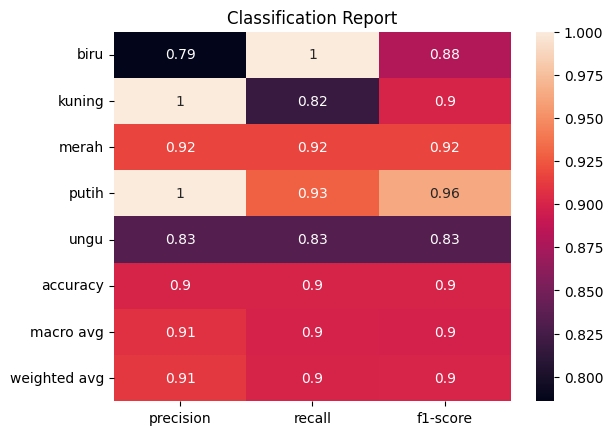

In [76]:
# Menampilkan grafik Classification Report
report = classification_report(y_test_aug, y_pred_aug, target_names=colors, output_dict=True) # Slice colors to match number of classes
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
plt.title('Classification Report')
plt.show()

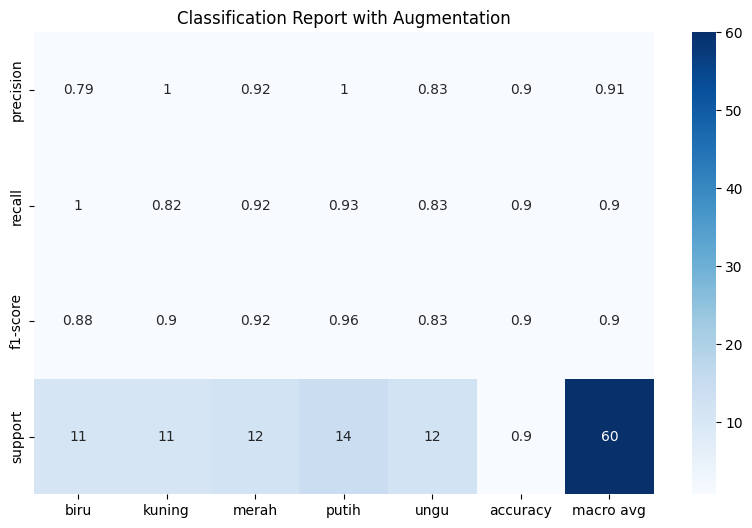

In [68]:
# Plot Classification Report
plt.figure(figsize=(10, 6))
sns.heatmap(report_aug_df.iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title('Classification Report with Augmentation')
plt.show()

In [69]:
# Membuat confusion matrix
cm_aug = confusion_matrix(y_test_aug, y_pred_aug)

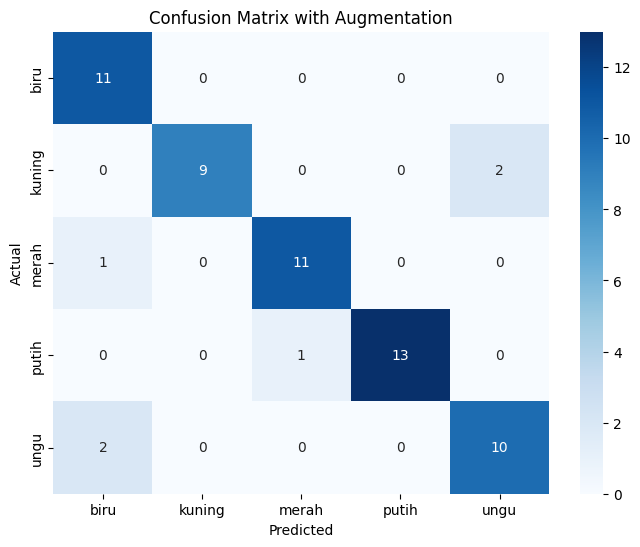

In [70]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_aug, annot=True, fmt="d", cmap="Blues", xticklabels=colors, yticklabels=colors)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Augmentation')
plt.show()

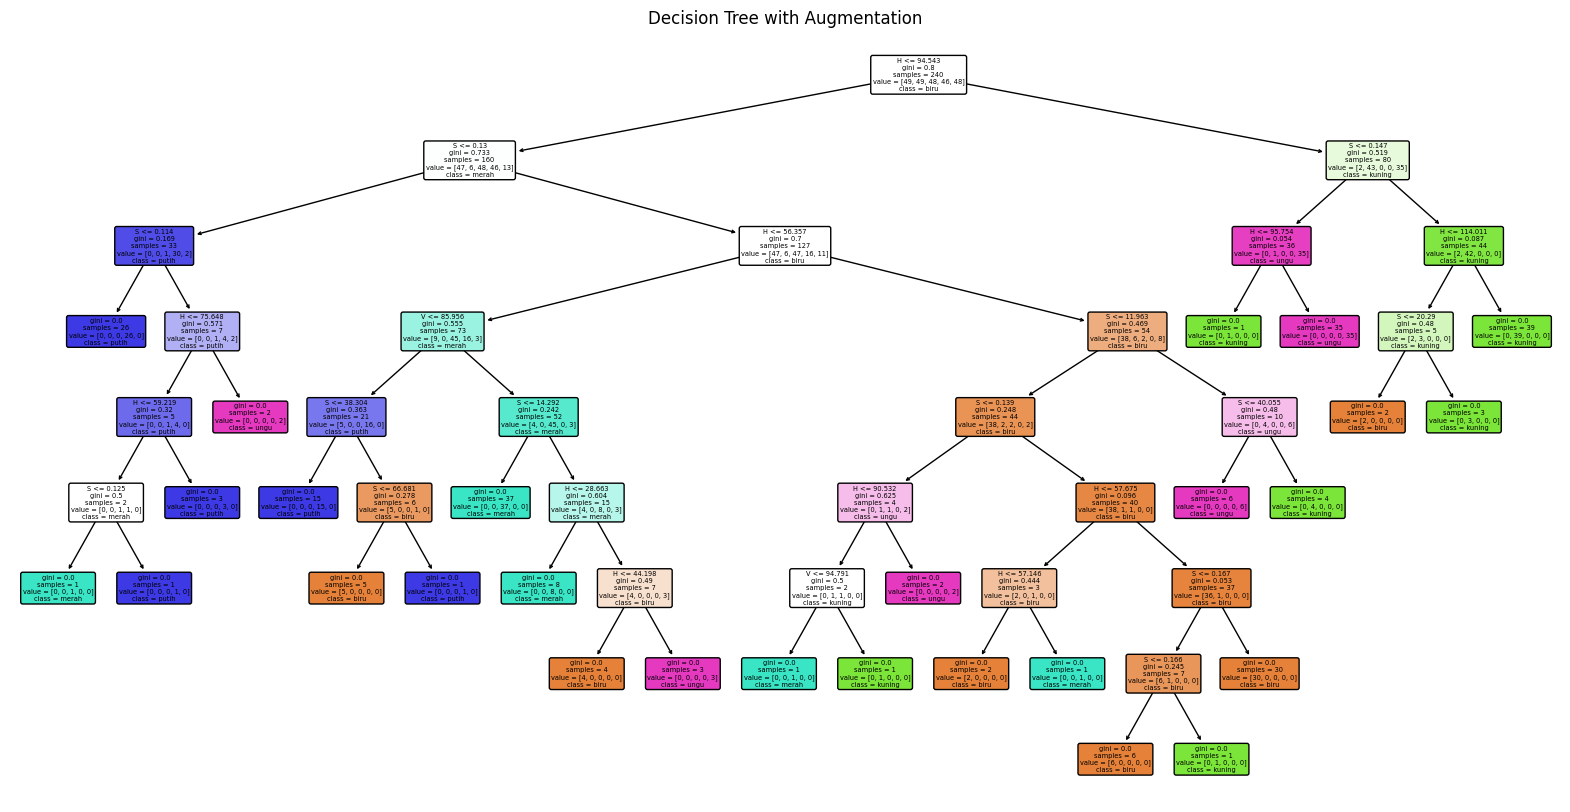

In [71]:
# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model_aug, feature_names=['H', 'S', 'V'], class_names=colors, filled=True, rounded=True)
plt.title('Decision Tree with Augmentation')
plt.show()